In [1]:
! pip install mdptoolbox-hiive
! pip install gym
! pip install pymdptoolbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 22.3 MB/s 
  Created wheel for mdptoolbox-hiive: filename=mdptoolbox_hiive-4.0.3.1-py3-none-any.whl size=35122 sha256=74e032d8bf75994c3379da4b40153986dc4e0f784f1668f8e8f74a8a3f2d882b
  Stored in directory: /root/.cache/pip/wheels/7e/57/29/d73571a87eb4167889f15457e0ed88c71292f0da5590681248
Successfully built mdptoolbox-hiive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pymdptoolbox: filename=pymdptoolbox-4.0b3-py3-none-any.whl size=25655 sha256=77c92672359d6ea55ddf026f08f5a0f99df693f71f5428950c665a7ce61af4b5
  Stored in directory: /root/.cache/pip/wheels/09/a8/27/a76d688633fa5d71984c288499c2170a8d06726135b8e216fd
Successfully built pymdptoolbox


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import hiive.mdptoolbox 
import hiive.mdptoolbox.mdp
import hiive.mdptoolbox.example
import mdptoolbox, mdptoolbox.example
import gym
import matplotlib.pyplot as plt
import time

0.05  VI policy:  (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
0.05  VI value function:  (156.9605394131871, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.47338488629296, 157.62381195121156, 158.17163733606023, 158.74835330749823, 159.35548346413273, 159.99463175436

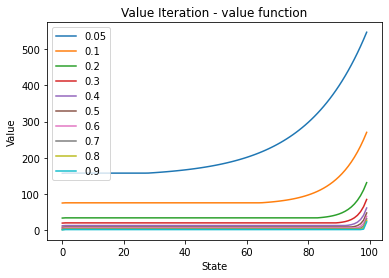

In [8]:
# Value Iteration, Policy Iteration vs probability of fire

plist=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
num_states = 100

VI_age=[]
VI_iter=[]
VI_cputime=[]
for prob in plist:
  P, R = hiive.mdptoolbox.example.forest(S=num_states, r1=20, r2=5, p=prob)
  VI_mdp = hiive.mdptoolbox.mdp.ValueIteration(P, R, 0.9999, epsilon=0.01, max_iter=1000, skip_check=True)
  VI_mdp.run()
  print(prob,' VI policy: ',VI_mdp.policy)
  print(prob,' VI value function: ',VI_mdp.V)
  VI_iter.append(VI_mdp.iter)
  VI_cputime.append(VI_mdp.time)
  plt.plot(VI_mdp.V, label=prob)
  plt.legend()
  plt.xlabel('State')
  plt.ylabel('Value')
  plt.title('Value Iteration - value function')

  age=[]
  a=0
  for i in range(1, len(VI_mdp.policy)):
    a=a+1
    if(VI_mdp.policy[i]==1):
      age.append(a)
      a=0
  if (a!=0):
    age.append(a)
  VI_age.append(100-max(age))

PI_age=[]
PI_iter=[]
PI_cputime=[]
for prob in plist:
  P, R = hiive.mdptoolbox.example.forest(S=num_states, r1=20, r2=5, p=prob)
  PI_mdp = hiive.mdptoolbox.mdp.ValueIteration(P, R, 0.9999, epsilon=0.01, max_iter=1000, skip_check=True)
  PI_mdp.run()
  PI_iter.append(PI_mdp.iter)
  PI_cputime.append(PI_mdp.time)


  age=[]
  a=0
  for i in range(1, len(PI_mdp.policy)):
    a=a+1
    if(PI_mdp.policy[i]==1):
      age.append(a)
      a=0
  if (a!=0):
    age.append(a)
  PI_age.append(100-max(age))
  



[28, 65, 83, 90, 93, 95, 96, 97, 98, 98]


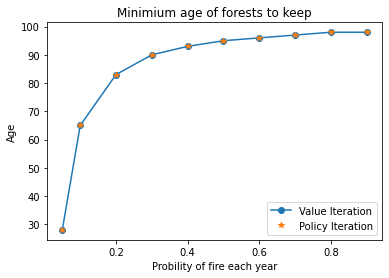

In [9]:
# plot results - age vs fire probability
plt.plot(plist, VI_age, 'o-', label='Value Iteration')
plt.plot(plist, PI_age, '*', label='Policy Iteration')
plt.xlabel('Probility of fire each year')
plt.ylabel('Age')
plt.title('Minimium age of forests to keep')
plt.legend()
print(VI_age)

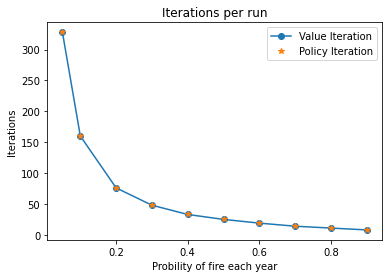

In [10]:
# plot results - iterations vs probability
plt.plot(plist, VI_iter, 'o-', label='Value Iteration')
plt.plot(plist, PI_iter, '*', label='Policy Iteration')
plt.xlabel('Probility of fire each year')
plt.ylabel('Iterations')
plt.title('Iterations per run')
plt.legend()

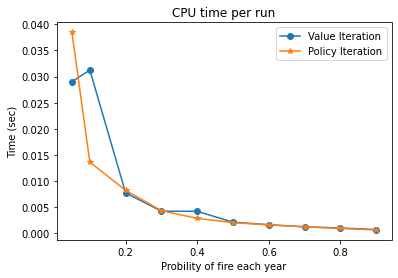

In [11]:
# plot results - cpu time vs probability
plt.plot(plist, VI_cputime, 'o-', label='Value Iteration')
plt.plot(plist, PI_cputime, '*-', label='Policy Iteration')
plt.xlabel('Probility of fire each year')
plt.ylabel('Time (sec)')
plt.title('CPU time per run')
plt.legend()

(0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0)
age:  [1, 1, 1, 7, 2, 2, 16, 11, 9, 3, 10, 2, 15, 1, 14, 1, 2, 8, 11, 13, 22, 12, 6, 8, 2, 11, 8]


Text(0.5, 1.0, 'Q-learning historgram for p=0.2')

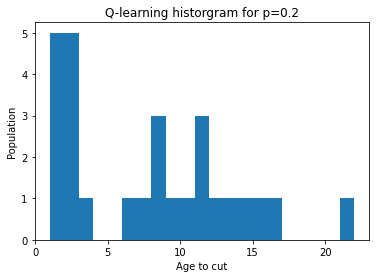

In [12]:
P, R = hiive.mdptoolbox.example.forest(S=200, r1=20, r2=5, p=0.2)
Q_mdp = hiive.mdptoolbox.mdp.QLearning(P, R, 0.95, n_iter=10000, skip_check=True)
st = time.time()
Q_mdp.run()
end = time.time()
end-st
print(Q_mdp.policy)

age=[]
a=0
for i in range(1, len(Q_mdp.policy)):
  a=a+1
  if(Q_mdp.policy[i]==1):
    age.append(a)
    a=0
if (a!=0):
  age.append(a)
print('age: ', age)
plt.hist(age, [*range(1, np.max(age)+1, 1)])
plt.xlabel('Age to cut')
plt.ylabel('Population')
plt.title('Q-learning historgram for p=0.2')

In [ ]:
print(Q_mdp.V)
#print(fm_q_mdp.Q)
print(Q_mdp.time)


(9.235084135270313, 9.770223375839283, 9.767331865833992, 9.21705407057911, 9.760647692364152, 2.2015304218791627, 3.7278343795441207, 6.2866649631990486, 8.865790999705636, 4.033360178843526, 1.6169865847669556, 5.807736619249883, 0.8836780114510236, 3.067967168713679, 6.9406485585763775, 4.026403071560142, 3.9003710342083737, 3.881151240395112, 1.5803688893201921, 5.818754350115659, 1.7016022720925805, 5.904395622494716, 3.7836513623306853, 3.692456506074125, 4.028285015624283, 1.5406431155503124, 5.6036892109142, 3.71087434756904, 3.77972917496334, 0.7855698501841375, 2.779550612900054, 6.883182772399685, 1.7325030397683352, 5.977035926782035, 1.5571758586349187, 5.761786851137452, 3.924746203170597, 1.4102347291648605, 5.700425695711894, 1.0046037386014701, 2.989686731966788, 7.003454962909181, 4.231505906378033, 1.5956956925179324, 5.723060564988577, 3.636687794419326, 1.6526745444401811, 5.889763735282024, 0.8692554169836769, 2.9690742589486137, 7.046320553842767, 4.2240538764093